In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
X_train, y_train = load_data("samples/microchips.csv") 

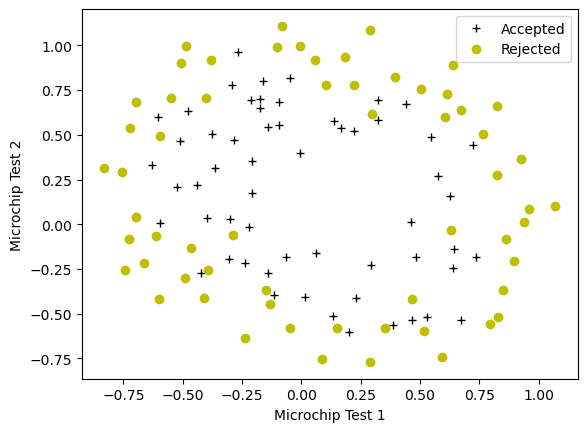

In [3]:
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(loc="upper right")
plt.show()

In [4]:
def sigmoid(z):
    g = 1.0 / (1.0 + np.exp(-z))
    return g

In [5]:
def compute_cost(X, y, w, b, _):
    m, n = X.shape

    total_cost = 0
    
    for i in range(m):
        zwb_x = np.dot(X[i], w) + b
        fwb_x = sigmoid(zwb_x)
        loss = (-y[i] * np.log(fwb_x)) - ((1 - y[i]) * np.log(1 - fwb_x))
        total_cost += loss

    total_cost = total_cost / m
    
    return total_cost

In [6]:
def compute_gradient(X, y, w, b, _):
    m, n = X.shape
    
    dj_db = .0
    dj_dw = np.zeros(w.shape)

    for i in range(m):
        zwb_x = np.dot(X[i], w) + b
        fwb_x = sigmoid(zwb_x)
        dj_db += fwb_x - y[i]

        for j in range(n):
            dj_dw[j] += (fwb_x - y[i]) * X[i][j]

    dj_db = dj_db / m
    dj_dw = dj_dw / m

    return dj_dw, dj_db

In [7]:
def compute_gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, lambda_, iterations):
    for idx in range(iterations):
        dj_dw, dj_db = compute_gradient(X, y, w_in, b_in, lambda_)

        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        if ((idx + 1) % 1000 == 0 or idx == 0):
            print(f"Iteration {(idx + 1):6} | Cost {cost_function(X, y, w_in, b_in, lambda_):8.2f}")


    return w_in, b_in    

In [8]:
def predict(w, b, x):
    m, n = x.shape
    p = np.zeros(m)

    for idx in range(m):
        zwb_x = np.dot(w, x[idx]) + b
        fwb_x = sigmoid(zwb_x)

        p[idx] = fwb_x >= .05

    return p

In [9]:
def evaluate(w, b, x, y):
    p = predict(w, b, x)

    return np.round(np.mean(p == y) * 100)

In [10]:
def show_non_linear_results(w, b, x, y, degree):
    plot_decision_boundary(w, b, x, y, degree)

    print(f"Precision: {evaluate(w, b, x, y)}%")
    plt.ylabel('Exam 2 score') 
    plt.xlabel('Exam 1 score') 
    plt.legend(loc="upper right")
    plt.show()

In [11]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

iterations = 10000
alpha = 0.05

w, b = compute_gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, -1, iterations)

Iteration      1 | Cost     3.89
Iteration   1000 | Cost     0.69
Iteration   2000 | Cost     0.69
Iteration   3000 | Cost     0.69
Iteration   4000 | Cost     0.69
Iteration   5000 | Cost     0.69
Iteration   6000 | Cost     0.69
Iteration   7000 | Cost     0.69
Iteration   8000 | Cost     0.69
Iteration   9000 | Cost     0.69
Iteration  10000 | Cost     0.69


Precision: 49.0%


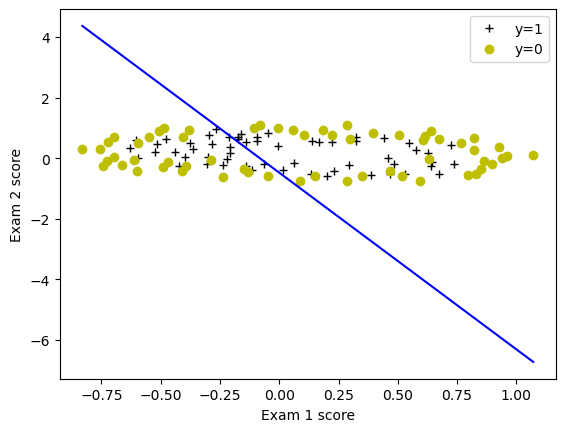

In [12]:
plot_linear_decision_boundary(w, b, X_train, y_train)

plt.ylabel('Exam 2 score') 
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
print(f"Precision: {evaluate(w, b, X_train, y_train)}%")
plt.show()

# Feature Engineering

As we can see, the model has a miserable precision. The reason for the poor precisions comes from the fact that a linear function cant quite fit the data. Hence, we can improve it applying **feature engineering** to have a non linear model.

Let's try it with greater progressive polynomial degrees$

## Degree 2 (54% precision) 

Iteration      1 | Cost     0.68
Iteration   1000 | Cost     0.57
Iteration   2000 | Cost     0.51
Iteration   3000 | Cost     0.47
Iteration   4000 | Cost     0.45
Iteration   5000 | Cost     0.43
Iteration   6000 | Cost     0.42
Iteration   7000 | Cost     0.41
Iteration   8000 | Cost     0.40
Iteration   9000 | Cost     0.39
Iteration  10000 | Cost     0.39
Precision: 54.0%


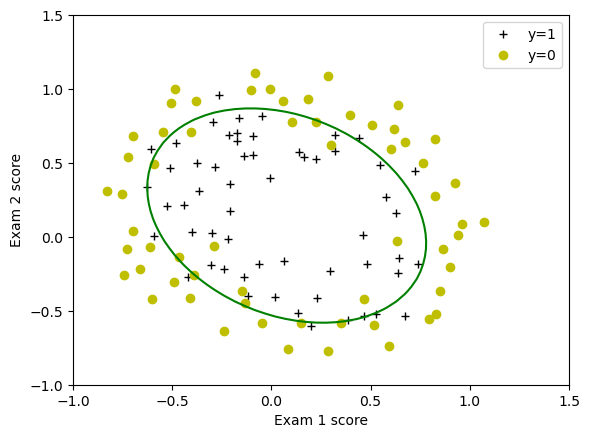

In [13]:
mapped_X2_train = map_feature(X_train[:, 0], X_train[:, 1], 2)
initial_w2 = np.random.rand(mapped_X2_train.shape[1]) - 0.5
initial_b2 = 0.5

w2, b2 = compute_gradient_descent(mapped_X2_train, y_train, initial_w2, initial_b2, compute_cost, compute_gradient, alpha, -1, iterations)
show_non_linear_results(w2, b2, mapped_X2_train, y_train, 2)

### Degree 3 (55% precision)

Iteration      1 | Cost     0.74
Iteration   1000 | Cost     0.57
Iteration   2000 | Cost     0.51
Iteration   3000 | Cost     0.47
Iteration   4000 | Cost     0.45
Iteration   5000 | Cost     0.43
Iteration   6000 | Cost     0.41
Iteration   7000 | Cost     0.40
Iteration   8000 | Cost     0.39
Iteration   9000 | Cost     0.39
Iteration  10000 | Cost     0.38
Precision: 55.0%


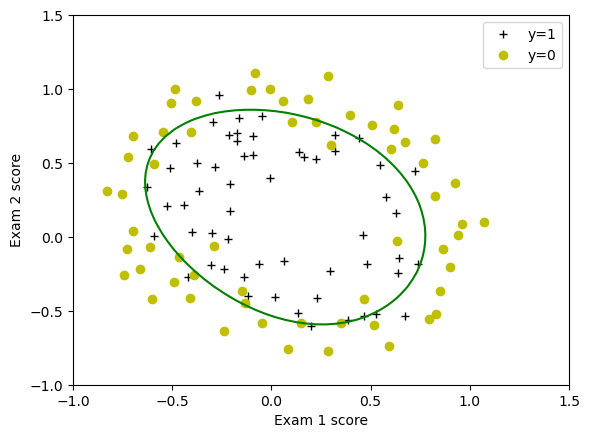

In [14]:
mapped_X3_train = map_feature(X_train[:, 0], X_train[:, 1], 3)
initial_w3 = np.random.rand(mapped_X3_train.shape[1]) - 0.5
initial_b3 = 0.5

w3, b3 = compute_gradient_descent(mapped_X3_train, y_train, initial_w3, initial_b3, compute_cost, compute_gradient, alpha, -1, iterations)
show_non_linear_results(w3, b3, mapped_X3_train, y_train, 3)

### Degree 4 (58% precision)

Iteration      1 | Cost     0.80
Iteration   1000 | Cost     0.53
Iteration   2000 | Cost     0.47
Iteration   3000 | Cost     0.43
Iteration   4000 | Cost     0.41
Iteration   5000 | Cost     0.39
Iteration   6000 | Cost     0.38
Iteration   7000 | Cost     0.38
Iteration   8000 | Cost     0.37
Iteration   9000 | Cost     0.37
Iteration  10000 | Cost     0.36
Precision: 58.0%


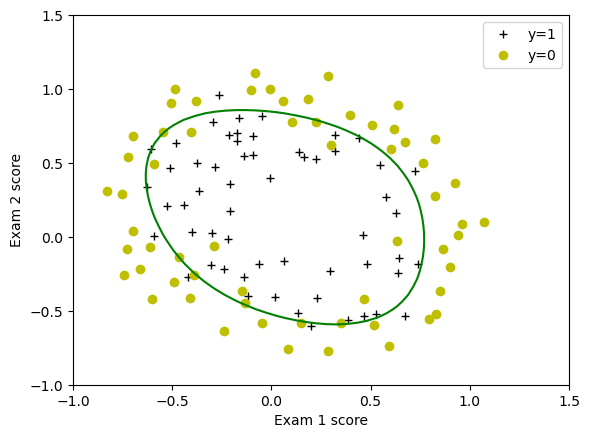

In [15]:
mapped_X4_train = map_feature(X_train[:, 0], X_train[:, 1], 4)
initial_w4 = np.random.rand(mapped_X4_train.shape[1]) - 0.5
initial_b4 = 0.5

w4, b4 = compute_gradient_descent(mapped_X4_train, y_train, initial_w4, initial_b4, compute_cost, compute_gradient, alpha, -1, iterations)
show_non_linear_results(w4, b4, mapped_X4_train, y_train, 4)

### Degree 5 (60% precision)

Iteration      1 | Cost     0.77
Iteration   1000 | Cost     0.54
Iteration   2000 | Cost     0.47
Iteration   3000 | Cost     0.43
Iteration   4000 | Cost     0.41
Iteration   5000 | Cost     0.40
Iteration   6000 | Cost     0.38
Iteration   7000 | Cost     0.38
Iteration   8000 | Cost     0.37
Iteration   9000 | Cost     0.37
Iteration  10000 | Cost     0.36
Precision: 60.0%


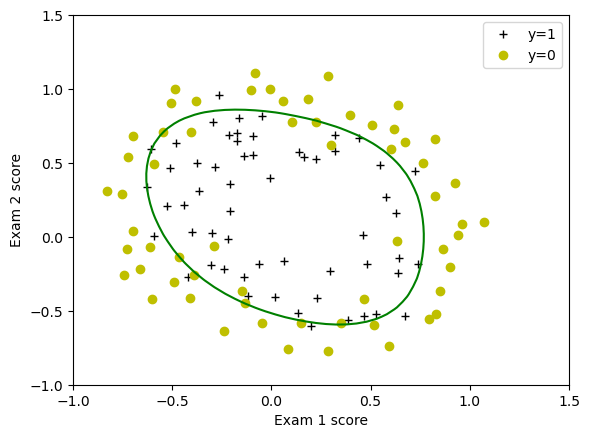

In [16]:
mapped_X5_train = map_feature(X_train[:, 0], X_train[:, 1], 5)
initial_w5 = np.random.rand(mapped_X5_train.shape[1]) - 0.5
initial_b5 = 0.5

w5, b5 = compute_gradient_descent(mapped_X5_train, y_train, initial_w5, initial_b5, compute_cost, compute_gradient, alpha, -1, iterations)
show_non_linear_results(w5, b5, mapped_X5_train, y_train, 5)

### Degree 6 (60% precision)

Iteration      1 | Cost     0.75
Iteration   1000 | Cost     0.51
Iteration   2000 | Cost     0.45
Iteration   3000 | Cost     0.42
Iteration   4000 | Cost     0.40
Iteration   5000 | Cost     0.39
Iteration   6000 | Cost     0.38
Iteration   7000 | Cost     0.37
Iteration   8000 | Cost     0.37
Iteration   9000 | Cost     0.36
Iteration  10000 | Cost     0.36
Precision: 60.0%


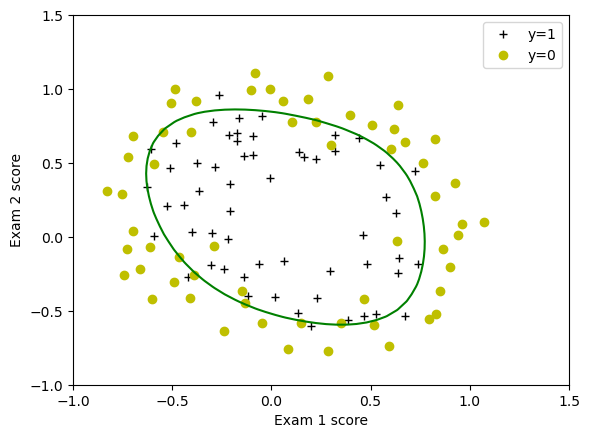

In [17]:
mapped_X6_train = map_feature(X_train[:, 0], X_train[:, 1], 6)
initial_w6 = np.random.rand(mapped_X6_train.shape[1]) - 0.5
initial_b6 = 0.5

w6, b6 = compute_gradient_descent(mapped_X6_train, y_train, initial_w6, initial_b6, compute_cost, compute_gradient, alpha, -1, iterations)
show_non_linear_results(w6, b6, mapped_X6_train, y_train, 6)

### Degree 7 (61% precision)

In [ ]:
mapped_X7_train = map_feature(X_train[:, 0], X_train[:, 1], 7)
initial_w7 = np.random.rand(mapped_X7_train.shape[1]) - 0.5
initial_b7 = 0.5

w7, b7 = compute_gradient_descent(mapped_X7_train, y_train, initial_w7, initial_b7, compute_cost, compute_gradient, alpha, -1, iterations)
show_non_linear_results(w7, b7, mapped_X7_train, y_train, 7)

Iteration      1 | Cost     0.79
Iteration   1000 | Cost     0.51
